In [ ]:
!pip install konlpy

In [ ]:
!python3 -m pip install --upgrade pip

In [ ]:
!python3 -m pip install konlpy

In [ ]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl

In [ ]:
!python3 -m pip install --upgrade pip

In [ ]:
!python3 -m pip install konlpy

In [ ]:
!sudo apt-get install curl git

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
!pip install mecab-python3

In [ ]:
import pandas as pd

train_df = pd.read_csv("20200402_koco_merged_train.tsv", sep='\t')
test_df = pd.read_csv("20200402_koco_merged_test.tsv", sep='\t')
train_df

,contents,label
0,김길태가 게이엿다면 어떻게됫을까?,1
1,옷입고해...,1
2,간간히 음담패설 나오지? 그게 일반인들이 너거들보는 시선이야 평생말이다 알겠냐?,1
3,인류의 문명은 인간의본성의 기초해 발전하고 만들어온거다 그런대 기본을 부정한다면 인...,1
4,썩은 가지는 쳐내야한다~~~그래야 건강한 나무가 된다~~~,1
...,...,...
8831,힘내세요~ 응원합니다!!,0
8832,힘내세요~~삼가 고인의 명복을 빕니다..,0
8833,힘내세용 ^^ 항상 응원합니닷 ^^ !,0
8834,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,0


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
train_df['contents'].nunique(), train_df['label'].nunique()

(8836, 2)

In [ ]:
train_df.drop_duplicates(subset=['contents'], inplace=True)

In [ ]:
print('샘플:', len(train_df))

샘플: 8836


<Axes: xlabel='label'>

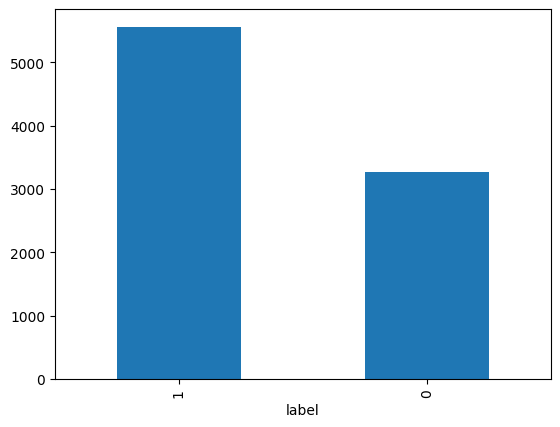

In [ ]:
train_df['label'].value_counts().plot(kind='bar')

In [ ]:
print(train_df.groupby('label').size().reset_index(name='count'))

   label  count
0      0   3273
1      1   5563


In [ ]:
print(train_df.isnull().values.any())

False


In [ ]:
train_df = train_df.dropna(how='any')
print(train_df.isnull().values.any())

False


In [ ]:
print(len(train_df))

8836


In [ ]:
train_df['contents'] = train_df['contents'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)

In [ ]:
train_df

,contents,label
0,김길태가 게이엿다면 어떻게됫을까,1
1,옷입고해,1
2,간간히 음담패설 나오지 그게 일반인들이 너거들보는 시선이야 평생말이다 알겠냐,1
3,인류의 문명은 인간의본성의 기초해 발전하고 만들어온거다 그런대 기본을 부정한다면 인...,1
4,썩은 가지는 쳐내야한다그래야 건강한 나무가 된다,1
...,...,...
8831,힘내세요 응원합니다,0
8832,힘내세요삼가 고인의 명복을 빕니다,0
8833,힘내세용 항상 응원합니닷,0
8834,힘내소연기로 답해요나도 살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,0


In [ ]:
train_df['contents'] = train_df['contents'].str.replace('^ +', '', regex=True)
train_df['contents'].replace('', np.nan, inplace=True, regex=True)
print(train_df.isnull().sum())

contents    1
label       0
dtype: int64


In [ ]:
train_df.loc[train_df.contents.isnull()]

,contents,label
3157,NaN,1


In [ ]:
train_df = train_df.dropna(how='any')
print(len(train_df))

8835


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯',
             '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
mecab = Mecab()

In [ ]:
X_train = []
for sentence in tqdm(train_df['contents']):
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 8835/8835 [00:02<00:00, 3811.35it/s]


In [ ]:
X_train

[['김길태', '게이', '엿', '다면', '어떻', '됫을까'],
 ['옷', '입', '해'],
 ['간간히',
  '음담패설',
  '나오',
  '그게',
  '일반인',
  '너거들',
  '보',
  '시선',
  '야',
  '평생',
  '말',
  '알',
  '겠',
  '냐'],
 ['인류',
  '문명',
  '인간',
  '본성',
  '기초',
  '해',
  '발전',
  '만들',
  '어',
  '온',
  '거',
  '그런대',
  '기본',
  '부정',
  '한다면',
  '인류',
  '혼란',
  '당연',
  '거',
  '그런대',
  '과연',
  '소수',
  '위해',
  '다수',
  '혼란',
  '스러워야',
  '할까',
  '과연',
  '현재',
  '다수',
  '사람',
  '잘못',
  '된',
  '것',
  '일까'],
 ['썩', '가지', '쳐내', '야', '한다', '그래야', '건강', '나무', '된다'],
 ['정부', '동성애', '지지', '것', '같', '음'],
 ['이란',
  '집회',
  '왜',
  '허',
  '거',
  '해',
  '준',
  '거',
  '냐',
  '설마',
  '박주신',
  '군',
  '면제',
  '진짜',
  '사유',
  '동성애',
  '자라',
  '서',
  '그란',
  '거',
  '아니',
  '냐'],
 ['동성애자',
  '부모',
  '없이',
  '태어난',
  '놈',
  '공자',
  '내',
  '관측',
  '부류',
  '중',
  '가장',
  '쓰레기',
  '같',
  '집단',
  '꼽',
  '자면',
  '난',
  '주저',
  '없이',
  '동성애자',
  '꼽',
  '것',
  '다갈',
  '릴레이',
  '좋',
  '동성애자',
  '오직',
  '죽',
  '동성애자',
  '뿐',
  '카이사르',
  '동성애자',
  '모두',
  '가스실',
  '모아서',
  '최

In [ ]:
from konlpy.tag import Okt
okt = Okt()

X_test = []
for sentence in tqdm(test_df['contents']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 2205/2205 [00:26<00:00, 84.63it/s] 


In [ ]:
y_train = np.array(train_df['label'])
y_test = np.array(test_df['label'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

In [ ]:
print('--------------- 학습 데이터 비율 ---------------')
print(f'부정 댓글: {round(np.sum(y_train==0)/len(y_train)*100, 3)}%')
print(f'긍정 댓글: {round(np.sum(y_train)/len(y_train)*100, 3)}%')
print('--------------- 검증 데이터 비율 ---------------')
print(f'부정 댓글: {round(np.sum(y_valid==0)/len(y_valid)*100, 3)}%')
print(f'긍정 댓글: {round(np.sum(y_valid)/len(y_valid)*100, 3)}%')
print('--------------- 테스트 데이터 비율 ---------------')
print(f'부정 댓글: {round(np.sum(y_test==0)/len(y_test)*100, 3)}%')
print(f'긍정 댓글: {round(np.sum(y_test)/len(y_test)*100, 3)}%')

--------------- 학습 데이터 비율 ---------------
부정 댓글: 37.04%
긍정 댓글: 62.96%
--------------- 검증 데이터 비율 ---------------
부정 댓글: 37.068%
긍정 댓글: 62.932%
--------------- 테스트 데이터 비율 ---------------
부정 댓글: 26.122%
긍정 댓글: 73.878%


In [ ]:
word_list = []
for sent in X_train:
  for word in sent:
    word_list.append(word)

word_counts = Counter(word_list)
print('총 단어 수:', len(word_counts))

총 단어 수: 13062


In [ ]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개')
print(vocab[:10])

등장 빈도수 상위 10개
['동성애', '축제', '있', '거', '것', '면', '안', '에서', '으로', '나']


In [ ]:
threshold = 3
total_cnt = len(word_counts)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in word_counts.items():
  total_freq = total_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq += value

print('단어 집합의 크기:', total_cnt)
print(f'등장 빈도가 {threshold-1}번 이하인 희귀 단어의 수: {rare_cnt}')
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq/total_freq*100))

단어 집합의 크기: 13062
등장 빈도가 2번 이하인 희귀 단어의 수: 8307
단어 집합에서 희귀 단어의 비율: 63.59669269637115
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.069652291776161


In [ ]:
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기:', len(vocab))

단어 집합의 크기: 4755


In [ ]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

In [ ]:
for index, word in enumerate(vocab):
  word_to_index[word] = index+2

vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기:', vocab_size)

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기: 4757


In [ ]:
print('단어 <PAD>와 맵핑되는 정수:', word_to_index['<PAD>'])
print('단어 <UNK>와 맵핑되는 정수:', word_to_index['<UNK>'])
# print('단어 영화와 맵핑되는 정수:', word_to_index['영화'])

단어 <PAD>와 맵핑되는 정수: 0
단어 <UNK>와 맵핑되는 정수: 1


In [ ]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try: index_sequences.append(word_to_index[word])
      except KeyError: index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

encoded_X_train = texts_to_sequences(X_train, word_to_index)
encoded_X_valid = texts_to_sequences(X_valid, word_to_index)
encoded_X_test = texts_to_sequences(X_test, word_to_index)

In [ ]:
for sent in encoded_X_train[:2]: print(sent)

[881, 13, 882, 395]
[660, 1, 127, 3, 542, 290, 3, 24, 3047, 1773, 41, 186, 18, 19, 1, 320, 542]


In [ ]:
index_to_word = {}
for key, value in word_to_index.items():
  index_to_word[value] = key

In [ ]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플:', X_train[0])
print('복원된 첫번째 샘플', decoded_sample)

기존의 첫번째 샘플: ['공연', '보', '맙시다', 'ㅠ']
복원된 첫번째 샘플 ['공연', '보', '맙시다', 'ㅠ']


댓글의 최대 길이: 124
댓글의 평군 길이: 20.45897000565931


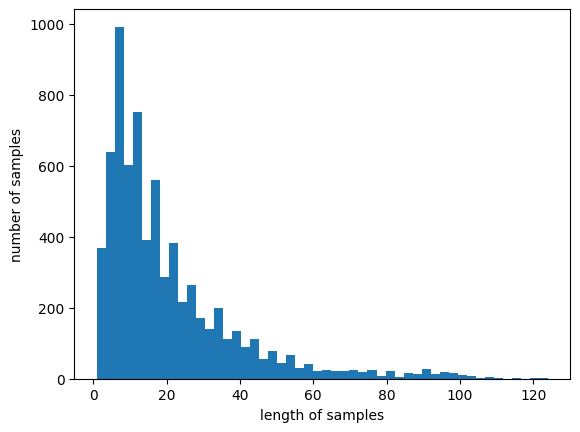

In [ ]:
print('댓글의 최대 길이:', max(len(review) for review in encoded_X_train))
print('댓글의 평군 길이:', sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if (len(sentence) <= max_len):
      count += 1
  print(f'전체 샘플중 길이가 {max_len} 이하인 샘플의 비율: {(count/len(nested_list))*100}')

max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플중 길이가 30 이하인 샘플의 비율: 79.65478211658179


In [ ]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기:', padded_X_train.shape)
print('검증 데이터의 크기:', padded_X_valid.shape)
print('테스트 데이터의 크기:', padded_X_test.shape)

훈련 데이터의 크기: (7068, 30)
검증 데이터의 크기: (1767, 30)
테스트 데이터의 크기: (2205, 30)


In [ ]:
print('첫번째 샘플의 길이:', len(padded_X_train[0]))
print('첫번째 샘플:', padded_X_train[0])

첫번째 샘플의 길이: 30
첫번째 샘플: [881  13 882 395   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print('cpu와 cuda중 다음 기기로 학습함:', device)

cpu와 cuda중 다음 기기로 학습함: cuda


In [ ]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])

tensor([0, 1, 0, 0, 1])


In [ ]:
class TextClassifier(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
    super(TextClassifier, self).__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    embedded = self.embedding(x)
    lstm_out, (hidden, cell) = self.lstm(embedded)
    last_hidden = hidden.squeeze(0)
    logits = self.fc(last_hidden)
    return logits

In [ ]:
padded_X_test.shape

(2205, 30)

In [ ]:
y_test.shape

(2205,)

In [ ]:
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)


In [ ]:
total_batch = len(train_dataloader)
print('총 배치의 수:', total_batch)

총 배치의 수: 221


In [ ]:
embedding_dim = 100
hidden_dim = 128
output_dim = 2
learning_rate = 0.01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(4757, 100)
  (lstm): LSTM(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


In [ ]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.type(torch.LongTensor).to(device), batch_y.type(torch.LongTensor).to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy


In [ ]:
num_epochs = 100

best_val_loss = float('inf')

for epoch in range(num_epochs):
  train_loss = 0
  train_correct = 0
  train_total = 0
  model.train()
  for batch_X, batch_y in train_dataloader:
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    logits = model(batch_X)

    loss = criterion(logits, batch_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    train_correct += (calculate_accuracy(logits, batch_y) * batch_y.size(0))
    train_total += batch_y.size(0)
  train_accuracy = train_correct / train_total
  train_loss /= len(train_dataloader)

  val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

  print(f'Epoch {epoch+1}/{num_epochs}:')
  print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
  print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy}')

  if val_loss < best_val_loss:
    print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장.')
    best_val_loss = val_loss
    torch.save(model.state_dict(), 'best_model_check_point.pth')

Epoch 1/100:
Train Loss: 0.0238, Train Accuracy: 0.9942
Validation Loss: 0.1834, Validation Accuracy: 0.9530277306168647
Validation loss improved from inf to 0.1834. 체크포인트를 저장.
Epoch 2/100:
Train Loss: 0.0129, Train Accuracy: 0.9973
Validation Loss: 0.2113, Validation Accuracy: 0.946236559139785
Epoch 3/100:
Train Loss: 0.0084, Train Accuracy: 0.9977
Validation Loss: 0.2128, Validation Accuracy: 0.9581211092246746
Epoch 4/100:
Train Loss: 0.0145, Train Accuracy: 0.9956
Validation Loss: 0.2076, Validation Accuracy: 0.9530277306168647
Epoch 5/100:
Train Loss: 0.0182, Train Accuracy: 0.9949
Validation Loss: 0.1968, Validation Accuracy: 0.9564233163554047
Epoch 6/100:
Train Loss: 0.0081, Train Accuracy: 0.9983
Validation Loss: 0.2053, Validation Accuracy: 0.9496321448783248
Epoch 7/100:
Train Loss: 0.0061, Train Accuracy: 0.9983
Validation Loss: 0.2307, Validation Accuracy: 0.9564233163554047
Epoch 8/100:
Train Loss: 0.0032, Train Accuracy: 0.9993
Validation Loss: 0.2274, Validation Accura

In [ ]:
model.load_state_dict(torch.load('/content/best_model_check_point.pth'))

model.to(device)

TextClassifier(
  (embedding): Embedding(4757, 100)
  (lstm): LSTM(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')


Best model validation loss: 0.1735
Best model validation accuracy: 0.9434


In [ ]:
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')


Best model test loss: 1.2365
Best model test accuracy: 0.7642


In [ ]:
index_to_tag = {0 : '정상', 1 : '성관련 발언'}

def predict(text, model, word_to_index, index_to_tag):
    # Set the model to evaluation mode
    model.eval()

    # Tokenize the input text
    tokens = mecab.morphs(text) # 토큰화
    tokens = [word for word in tokens if not word in stopwords] # 불용어 제거
    token_indices = [word_to_index.get(token, 1) for token in tokens]

    # Convert tokens to tensor
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # Pass the input tensor through the model
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # Get the predicted class index
    predicted_index = torch.argmax(logits, dim=1)

    # Convert the predicted index to its corresponding tag
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

In [ ]:
test_input = "아이즈원 힘내세요...일본 진출도 했으니 일본서 좋은 모습 보여줘도 팬들은 응원 합니다."
predict(test_input, model, word_to_index, index_to_tag)

'정상'